In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA, SparsePCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
    
if __name__ == '__main__':
    df = pd.read_csv('winequality-red-full.csv')
    x = df.drop("quality", axis=1)
    #Scaling the data for setting the mean to 0 and standard deviation to 1 
    #Giving it a feel of a "standard" normal distribution
    scaler = StandardScaler()
    scaler.fit(x)
    x = scaler.transform(x)
    y = df["quality"]
    reg = LogisticRegression(max_iter = 2500)
    #Using 80% data to train the model and 20% to test the data
    X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.20,random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print("Train accuracy:", np.round(accuracy_score(y_train, reg.predict(X_train)), 2))
    print("Test accuracy:", np.round(accuracy_score(y_test, y_pred), 2))

Train accuracy: 0.62
Test accuracy: 0.57


## Applied logistic regression as the quality of the wine is categorical
### When applying logistic regression the accuracy obtained is 0.57 for the fullset data

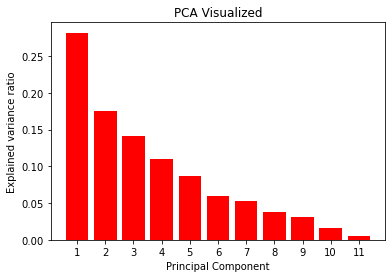

In [19]:

#Applying principal component analysis with principal components set to 11
pca = PCA(n_components=11)
pca.fit(x)
#Creating a bar plot to identify the required principal components
plt.bar(range(1,12), pca.explained_variance_ratio_, color='red')
plt.title("PCA Visualized")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal Component")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11])
plt.show()

# Applying PCA and plotting the bar graph:
### As observed the bar graph indicates that 11 Principal components are of significance based on the variance ratio

In [20]:
pca = PCA(n_components=11)
data = pca.fit_transform(x)
data = pd.DataFrame(data)
print(data.shape)

(1599, 11)


# Retaining the dimension as 11:
### Transforming the data by reducing the dimensionality but in this particular case. The PCA indicates that all the principal components are of significance. So we expect the result to be same as that with the full dataset.

In [21]:
reg = LogisticRegression(max_iter = 2500)
#Using 80% data to train the model and 20% to test the data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(data, y, test_size=0.20, random_state=42)
reg.fit(X_train_pca, y_train)
y_pred = reg.predict(X_test_pca)
print("Train accuracy:", np.round(accuracy_score(y_train, reg.predict(X_train_pca)), 2))
print("Test accuracy:", np.round(accuracy_score(y_test, y_pred), 2))

Train accuracy: 0.62
Test accuracy: 0.57


# Applying logistic regression after retaining the dimensionality:
### has yielded in the similar performance as that for the fulldata set which is as expected.
### I believe this dimensionality reduction was a useful technique for solving this regression problem .Since the dataset, worked on contain all principal component as of significance and the performance cannot be improved any further. Also looking at the dataset, its 12 dimension which is not complex and it will not complicate regression when building the model.